# Clase 21: EDOs - Runge Kutta

In [64]:
import numpy as np
import matplotlib.pyplot as plt

Los métodos de Taylor de alto orden son muy precisos pero requieren conocer las derivadas de alto orden de la función $f$. Como esto puede ser inconveniente, no se usan mucho en la práctica.

Los métodos de Runge-Kutta logran el error de truncación local de alto orden sin necesitar esas derivadas.

## Runge Kutta

Supongamos que queremos utilizar una aproximación de Taylor de segundo orden

$$
T^{(2)} = f(t, y) + \frac{h}{2}f'(t, y)\,.
$$

Para no calcular la derivada, sabemos que la misma información está contenida en la función $f$, así que escribimos $a_1 f(t + \alpha_1, y + \beta_1)$ y buscamos coeficientes tales que esta expresión sea aproximadamente igual a $T^{(2)}$ con un error de orden $h^2$ (que de todas formas tenemos al usar $T^{(2)}$ para resolver la ecuación diferencial).

Primero escribimos

$$
\frac{df}{dt}(t, y) = \frac{\partial f}{\partial t}(t, y) + \frac{\partial f}{\partial y}(t, y) y'(t)
$$

tal que 

$$
T^{(2)} = f(t, y) + \frac{h}{2}\frac{\partial f}{\partial t}(t, y) + \frac{h}{2}f(t, y)\frac{\partial f}{\partial y}(t, y)\,.
$$

Ahorar comparamos con

$$
a_1 f(t + \alpha_1, y + \beta_1) \approx a_1 f(t, y) + a_1 \alpha_1 \frac{\partial f}{\partial t}(t, y) + a_1 \beta_1\frac{\partial f}{\partial y}(t, y) 
$$

El error de esta aproximación está dado por el teorema de Taylor

$$
R = \frac{\alpha_1^2}{2}\frac{\partial^2 f}{\partial t^2}(\xi, \mu) + \alpha_1 \beta_1\frac{\partial^2 f}{\partial t \partial y}(\xi, \mu) + \frac{\beta_1^2}{2}\frac{\partial^2 f}{\partial y^2}(\xi, \mu)
$$

Ahora hacemos $a_1 f(t + \alpha_1, y + \beta_1) = T^{(2)}$ y resolvemos para obtener

$$
a_1 = 1\,,\quad \alpha_1 = \frac{h}{2}\,,\quad \beta_1 = \frac{h}{2} f(t, y)\,,
$$

y entonces el error de Taylor es de orden $h^2$ que es lo que queríamos. Mientras las derivadas parciales estén acottadas tenemos entonces un método con error de orden $h^2$ sin calcular derivadas. Lo podemos llamar Runge-Kutta de orden 2 o método del punto medio.

In [65]:
def midpoint(f, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    
    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*f(t + h/2, w + h/2*f(t, w))
        t = t + h
        
    ts[N] = t
    sol[N] = w
    
    return ts, sol

Este método lo podemos llamar Runge-Kutta de orden 2. Podemos continuar y buscar alguna aproximación para el polinomio de Taylor de orden 3, por lo que se escribe por ejemplo

$$
T^{(3)} = a_1 f(t + \alpha_1, y + \delta_1 f(t + \alpha_2, y + \delta_2 f(t,y))).
$$

Lo importante es tener suficientes coeficientes libres para acercarse al polinomio. Despejar los coeficientes es engorroso, pero existen métodos de este orden.

Por motivos que discutiremos más abajo, en la práctica se usa el método de Runge-Kutta de orden 4, que se puede obtener de manera análoga

In [66]:
def rk4(f, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    
    for i in range(N):
        ts[i] = t
        sol[i] = w
        k1 = h*f(t, w)
        k2 = h*f(t+h/2, w+k1/2)
        k3 = h*f(t+h/2, w+k2/2)
        k4 = h*f(t + h, w + k3)
        w = w + (k1 + 2*k2 + 2*k3 + k4)/6
        t = t + h
        
    ts[N] = t
    sol[N] = w
    
    return ts, sol

El método de Runge-Kutta orden 4 requiere $4$ evaluaciones de la función, lo que lo hace el doble de lento que el método de orden 2 para un mismo $N$. A su vez, el método de orden 2 requiere el doble de evaluaciones que el método de Euler. 

En general, al subir el orden se reduce el error pero aumenta el número de evaluaciones. Lo ideal es encontrar el método que produzca el menor error para un mismo número de evaluaciones. Estos suelen ser los métodos de orden $4$, aunque los métodos de orden $5$ a $7$ también son usados como veremos más abajo.

Como ejemplo consideremos el problema de la clase pasada

$$
y'(t) = y - t^2 + 1\,,\quad 0\leq t\leq 2\,,\quad y(0) = 0.5.
$$

In [67]:
def euler(f, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    
    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*f(t, w)
        t = t + h
        
    ts[N] = t
    sol[N] = w
    
    return ts, sol

In [68]:
def f(t, y):
    return y - t**2 + 1

In [69]:
ts_eul, sol_eul = euler(f, 0, 2, 0.5, 80)
ts_mid, sol_mid = midpoint(f, 0, 2, 0.5, 40)
ts_rk4, sol_rk4 = rk4(f, 0, 2, 0.5, 20)
exacta_eul = (ts_eul + 1)**2 - 0.5*np.exp(ts_eul)
exacta_mid = (ts_mid + 1)**2 - 0.5*np.exp(ts_mid)
exacta_rk4 = (ts_rk4 + 1)**2 - 0.5*np.exp(ts_rk4)

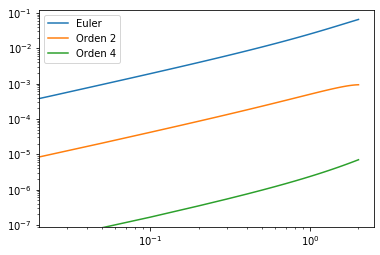

In [70]:
plt.loglog(ts_eul, abs(sol_eul - exacta_eul), label='Euler')
plt.loglog(ts_mid, abs(sol_mid - exacta_mid), label='Orden 2')
plt.loglog(ts_rk4, abs(sol_rk4 - exacta_rk4), label='Orden 4')
plt.legend()

## Control de errores y pasos adaptativos

Así como ocurre en las integrales, para las ecuaciones diferenciales lo ideal sería ir adaptando el tamaño de cada paso a la solución. De esta forma el programa gastará más tiempo cerca de los puntos donde la variación es más rápida. Si tenemos una estima del error, podemos requerir que el paso sea tal que el error esté por debajo de una cierta tolerancia.

Para ver cómo hacerlo, consideremos dos métodos que aproximan la solución, uno de orden $n$

$$
y(t_{i+1}) = y(t_i) + h\phi(t_i, y(t_i), h) + \mathcal{O}(h^{n+1})
$$

tal que

$$
w_{i+1} = w_i + h\phi(t_i, w_i, h)\,,
$$

y otro de orden $n + 1$

$$
y(t_{i+1}) = y(t_i) + h\tilde{\phi}(t_i, y(t_i), h) + \mathcal{O}(h^{n+2})
$$

tal que 

$$
\tilde{w}_{i+1} = \tilde{w}_i + h\tilde{\phi}(t_i, \tilde{w}_i, h)\,,
$$

Ahora bien

$$
\tau_{i+1}(h) = \frac{y(t_{i+1}) - y(t_i) - h\phi(t_i, y(t_i), h)}{h} \approx \frac{y(t_{i+1}) - w_i - h\phi(t_i, w_i, h)}{h} = \frac{1}{h}(y(t_{i+1}) - w_{i+1})
$$

y análogamente

$$
\tilde{\tau}_{i+1}(h) \approx \frac{1}{h}(y(t_{i+1}) - \tilde{w}_{i+1})\,.
$$

Entonces restando

$$
\tau_{i+1}(h) \approx \tilde{\tau}_{i+1}(h) + \frac{1}{h}(\tilde{w}_{i+1} - w_{i+1})
$$

y como $\tau$ es de orden $h^n$ mientras que $\tilde{\tau}$ es de orden $h^{n + 1}$, para $h \ll 1$ la mayor parte de $\tau$ debe venir del segundo término, y podemos escribir

$$
\tau_{i+1}(h) \approx \frac{1}{h}(\tilde{w}_{i+1} - w_{i+1})
$$


Podemos usar esa expresión para adaptar el paso. Si escribimos $\tau_{i+1}(h) \approx Kh^n$, entonces $\tau_{i+1}(qh) = q^n \tau_{i+1}(h)$. Esto nos dice de qué tamaño necesitamos hacer $q$ para obtener un error de una cierta tolerancia

$$
\frac{q^n}{h}|\tilde{w}_{i+1} - w_{i+1}| \approx |\tau_{i+1}(qh)| \leq \epsilon
$$

lo que implica

$$
q \leq \left(\frac{\epsilon h}{|\tilde{w}_{i+1} - w_{i+1}|}\right)^{1/n}
$$

Se usan entonces dos Runge Kutta de orden distinto para estimar el error en un paso dado, de esta manera se calcula $q$ y se re-calcula el paso si el error es demasiado grande. 

Un algoritmo que usa dos Runge-Kutta de orden 4 y 5, tales que las evaluaciones de la función usadas en el Runge-Kutta de orden 4 se pueden reutilizar en el orden 5, es el llamado Runge-Kutta-Fehlberg.

In [71]:
class MinStep(Exception):
    pass

def rkf(f, a, b, yo, tol, hmin, hmax):
    
    t = a
    w = yo
    h = hmax
    flag = 1
    
    ts = [t]
    sol = [w]
    hs = []
    rs = []
    
    while flag:
        
        # Evaluaciones de la función 
        k1 = h*f(t, w)
        k2 = h*f(t + h/4, w + k1/4)
        k3 = h*f(t + 3*h/8, w + 3*k1/32 + 9*k2/32)
        k4 = h*f(t + 12*h/13, w + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h*f(t + h, w + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
        k6 = h*f(t + h/2, w - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)
        
        # Estima del error dada por la diferencia entre dos RKs
        R = abs(k1/360 - 128*k3/4275 - 2197*k4/75240 + k5/50 + 2*k6/55)
        
        # Si el error es menor que la tolerancia, se acepta el paso
        if R <= tol:
            t += h
            w = w + 25*k1/216 + 1408*k3/2565 + 2197*k4/4104 - k5/5
            ts.append(t)
            sol.append(w)
            hs.append(h)
            rs.append(R)
            
        # el 0.84 es un factor para hacer la estima más conservadora 
        # corresponde a 1/2**(1/4)
        q = 0.84*(tol/R)**(1/4)
        
        # ACTUALIZACIÓN DE h
        # Se establece un q mínimo para no quedarse atrapado en alguna región.
        # Esto se puede cambiar.
        if q <= 0.1:
            h = 0.1*h
        # Se establece también un q máximo para no peder detalles de la función
        elif q >= 4:
            h = 4*h
        else:
            h = q*h
        if h > hmax:
            h = hmax
        
        # Si nos pasamos de b, terminamos
        if t >= b:
            flag = 0
        # El último paso debe llegar a b
        elif t + h > b:
            h = b - t
        elif h < hmin:
            raise MinStep('Se excedió el paso mínimo.')
            
    return np.array(ts), np.array(sol), np.array(hs), np.array(rs)

In [72]:
rkf(f, 0, 2, 0.5, 1e-6, 0.01, 0.25)

(array([0.        , 0.18812304, 0.38881414, 0.59046834, 0.79762343,
        1.01177324, 1.23756326, 1.48597794, 1.73597794, 1.94107482,
        2.        ]),
 array([0.5       , 0.8081457 , 1.19119039, 1.62717421, 2.12132311,
        2.67199762, 3.28309181, 3.97044924, 4.64834489, 5.16681193,
        5.30548045]),
 array([0.18812304, 0.2006911 , 0.2016542 , 0.20715509, 0.21414981,
        0.22579002, 0.24841468, 0.25      , 0.20509688, 0.05892518]),
 array([3.84390537e-07, 4.88427971e-07, 4.47057873e-07, 4.35942067e-07,
        4.02873762e-07, 3.39802909e-07, 1.59410559e-07, 3.87024526e-07,
        4.15898055e-07, 1.43447683e-09]))

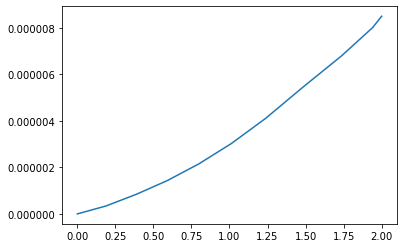

In [73]:
ts_rkf, sol_rkf, hs_rkf, rs_rkf = rkf(f, 0, 2, 0.5, 1e-6, 0.01, 0.25)
exacta_rkf = (ts_rkf + 1)**2 - 0.5*np.exp(ts_rkf)
plt.plot(ts_rkf, sol_rkf - exacta_rkf)

## Tareas

### Tarea 11.1

Modifique los métodos rkf y rk4 introducidos para imprimir el número de evaluaciones. Resuelva el problema de valor inicial

$$
y'(t) = te^{3t} - 2y\,,\quad 0\leq t \leq 1\,,\quad y(0) = 0\,,
$$

cuya solución exacta es $y(t) = \frac{1}{5}te^{3t} - \frac{1}{25}e^{3t} + \frac{1}{25}e^{-2t}$. Obtenga un error similar (y menor a $10^{-4}$) con ambos métodos y compare el número de evaluaciones. Discuta cuál es preferible y por qué.

In [224]:
def rk4_m(f, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    evals = 0
    
    for i in range(N):
        ts[i] = t
        sol[i] = w
        k1 = h*f(t, w)
        k2 = h*f(t+h/2, w+k1/2)
        k3 = h*f(t+h/2, w+k2/2)
        k4 = h*f(t + h, w + k3)
        w = w + (k1 + 2*k2 + 2*k3 + k4)/6
        t = t + h
        evals += 4
        
    ts[N] = t
    sol[N] = w
    
    print('Nro. de evaluaciones rk4:', evals)
    return ts, sol

In [225]:
class MinStep(Exception):
    pass

def rkf_m(f, a, b, yo, tol, hmin, hmax):
    
    t = a
    w = yo
    h = hmax
    flag = 1
    
    ts = [t]
    sol = [w]
    hs = []
    rs = []
    evals = 0
    
    while flag:
        
        # Evaluaciones de la función 
        k1 = h*f(t, w)
        k2 = h*f(t + h/4, w + k1/4)
        k3 = h*f(t + 3*h/8, w + 3*k1/32 + 9*k2/32)
        k4 = h*f(t + 12*h/13, w + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h*f(t + h, w + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
        k6 = h*f(t + h/2, w - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)
        evals += 6
        
        # Estima del error dada por la diferencia entre dos RKs
        R = abs(k1/360 - 128*k3/4275 - 2197*k4/75240 + k5/50 + 2*k6/55)
        
        # Si el error es menor que la tolerancia, se acepta el paso
        if R <= tol:
            t += h
            w = w + 25*k1/216 + 1408*k3/2565 + 2197*k4/4104 - k5/5
            ts.append(t)
            sol.append(w)
            hs.append(h)
            rs.append(R)
            
        # el 0.84 es un factor para hacer la estima más conservadora 
        # corresponde a 1/2**(1/4)
        q = 0.84*(tol/R)**(1/4)
        
        # ACTUALIZACIÓN DE h
        # Se establece un q mínimo para no quedarse atrapado en alguna región.
        # Esto se puede cambiar.
        if q <= 0.1:
            h = 0.1*h
        # Se establece también un q máximo para no peder detalles de la función
        elif q >= 4:
            h = 4*h
        else:
            h = q*h
        if h > hmax:
            h = hmax
        
        # Si nos pasamos de b, terminamos
        if t >= b:
            flag = 0
        # El último paso debe llegar a b
        elif t + h > b:
            h = b - t
        elif h < hmin:
            raise MinStep('Se excedió el paso mínimo.')
            
    print('Nro. de evaluaciones rkf:', evals)
    return np.array(ts), np.array(sol), np.array(hs), np.array(rs)

In [244]:
def f(t, y):
    return t*np.exp(3*t) - 2*y

a = 0
b = 1
yo = 0
tol = 1e-7

def exacta(t):
    return (1/5)*t*np.exp(3*t) - (1/25)*np.exp(3*t) + (1/25)*np.exp(-2*t)

In [251]:
sol_rkf = rkf_m(f, a, b, yo, tol, 0.0001, 0.2)
sol_rk4 = rk4_m(f, a, b, yo, 40)

Nro. de evaluaciones rkf: 120
Nro. de evaluaciones rk4: 160


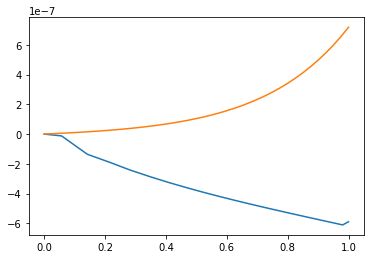

In [252]:
plt.plot(sol_rkf[0], sol_rkf[1] - exacta(sol_rkf[0]))
plt.plot(sol_rk4[0], sol_rk4[1] - exacta(sol_rk4[0]))

Alcanzamos un error similar para un número algo menor de evaluaciones para el RKF. El método de RKF es preferible ya que provee una estima del error cometido y al adaptar su paso requiere menos evaluaciones. Sin embargo, al arrojar la solución en un número menor de puntos, hay que poner cuidado con la interpolación.

### Tarea 11.2

Resuelva el siguiente problema de valor inicial usando el método de Runge-Kutta de orden 4 y el método de Taylor de orden 4.

$$
y'(t) = 1 + (t - y)^2\,,\quad 2 \leq t \leq 3\,,\quad y(2) = 1\,,
$$

que tiene solución exacta $y(t) = t + 1/(1-t)$. Compare los errores y el número de evaluaciones necesarias. ¿Cuál es preferible y por qué?

In [207]:
def f(t, y):
    return 1 + (t - y)**2

def df(t, y):
    return 2*(t - y)*(1 - f(t, y))

def d2f(t, y):
    return 2*(1 - f(t, y))**2 - 2*(t - y)*df(t, y)

def d3f(t, y):
    return -6*(1 - f(t, y))*df(t, y) - 2*(t - y)*d2f(t, y)

In [208]:
def taylor4(f, df, d2f, d3f, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    
    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*(f(t, w) + h*(df(t, w)/2 + h*(d2f(t, w)/6 + h*d3f(t, w)/24)))
        t = t + h
        
    ts[N] = t
    sol[N] = w
    
    return ts, sol

In [211]:
sol_rk4 = rk4(f, 2, 3, 1, 10)
sol_t4 = taylor4(f, df, d2f, d3f, 2, 3, 1, 10)

Text(0, 0.5, 'Error absoluto')

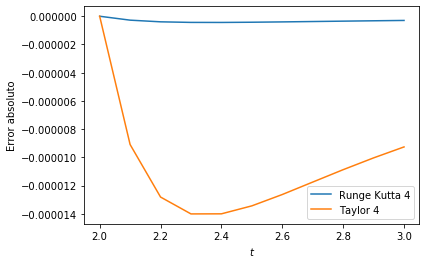

In [212]:
def exacta(t):
    return t + 1/(1 - t)

plt.plot(sol_rk4[0], sol_rk4[1] - exacta(sol_rk4[0]), label = 'Runge Kutta 4')
plt.plot(sol_t4[0], sol_t4[1] - exacta(sol_t4[0]), label = 'Taylor 4')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('Error absoluto')

El método de Runge Kutta tiene un error menor en este caso. Además, el método de Taylor requiere la evaluación de las derivadas de la función, lo que puede ser complicado en algunos casos.

### Tarea 11.3

Modifique el método de Runge-Kutta-Fehlberg para quedarse con la solución de orden 5 en vez de la solución de orden 4. La solución de orden 5 está dada por

$$
w_{i+1} = w_i + \frac{16}{135}k_1 + \frac{6656}{12825}k_3 + \frac{28561}{56430}k_4 - \frac{9}{50}k_5 + \frac{2}{55}k_6
$$

Úselo para resolver el siguiente problema de valor inicial con una tolerancia de $10^{-6}$

$$
y'(t) = \frac{2 - 2ty}{t^2 + 1}\,,\quad 0\leq t\leq 3\,,\quad y(0) = 1\,,
$$

que tiene una solución exacta $y(t) = (2t + 1)/(t^2 + 1)$. Compare con el método usual y discuta por qué se usa la solución de orden 4.

In [193]:
def exacta(t):
    return (2*t + 1)/(t**2 + 1)

In [194]:
class MinStep(Exception):
    pass

def rkf_m(f, a, b, yo, tol, hmin, hmax):
    
    t = a
    w = yo
    h = hmax
    flag = 1
    
    ts = [t]
    sol = [w]
    hs = []
    rs = []
    
    while flag:
        
        # Evaluaciones de la función 
        k1 = h*f(t, w)
        k2 = h*f(t + h/4, w + k1/4)
        k3 = h*f(t + 3*h/8, w + 3*k1/32 + 9*k2/32)
        k4 = h*f(t + 12*h/13, w + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h*f(t + h, w + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
        k6 = h*f(t + h/2, w - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)
        
        # Estima del error dada por la diferencia entre dos RKs
        R = abs(k1/360 - 128*k3/4275 - 2197*k4/75240 + k5/50 + 2*k6/55)
        
        # Si el error es menor que la tolerancia, se acepta el paso
        if R <= tol:
            t += h
            w = w + 16*k1/135 + 6656*k3/12825 + 28561*k4/56430 - 9*k5/50 + 2*k6/55
            ts.append(t)
            sol.append(w)
            hs.append(h)
            rs.append(R)
            
        # el 0.84 es un factor para hacer la estima más conservadora 
        # corresponde a 1/2**(1/4)
        q = 0.84*(tol/R)**(1/4)
        
        # ACTUALIZACIÓN DE h
        # Se establece un q mínimo para no quedarse atrapado en alguna región.
        # Esto se puede cambiar.
        if q <= 0.1:
            h = 0.1*h
        # Se establece también un q máximo para no peder detalles de la función
        elif q >= 4:
            h = 4*h
        else:
            h = q*h
        if h > hmax:
            h = hmax
        
        # Si nos pasamos de b, terminamos
        if t >= b:
            flag = 0
        # El último paso debe llegar a b
        elif t + h > b:
            h = b - t
        elif h < hmin:
            raise MinStep('Se excedió el paso mínimo.')
            
    return np.array(ts), np.array(sol), np.array(hs), np.array(rs)

In [195]:
def f(t, y):
    return (2 - 2*t*y)/(t**2 + 1)

a = 0
b = 3
yo = 1
hmin = 0.00001
hmax = 0.1
tol = 1e-6

In [196]:
sol = rkf(f, a, b, yo, tol, hmin, hmax)

In [197]:
sol_m = rkf_m(f, a, b, yo, tol, hmin, hmax)

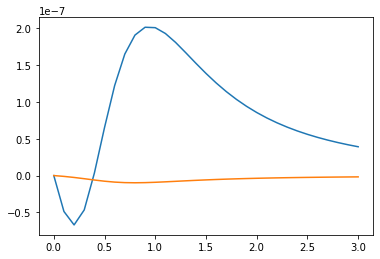

In [199]:
plt.plot(sol[0], sol[1] - exacta(sol[0]))
plt.plot(sol_m[0], sol_m[1] - exacta(sol_m[0]))

El método de quinto orden arroja un error menor. Sin embargo no tenemos control sobre ese error ya que necesitaríamos un método de sexto orden para estimarlo.

### Tarea 11.4

Ejercicio 5.4.28, libro de Burden

El agua fluye desde un tanque cónico invertido con un orificio circular en su punta a la razón

$$
\frac{dx}{dt} = -0.6\pi r^2 \sqrt{2g}\frac{\sqrt{x}}{A(x)}
$$

donde $r$ es el radio del orificio, $x$ es la altura del líquido desde el vértice del cono y $A(x)$ es el área de la sección transversal del cono a $x$ unidades sobre el orificio (el área de la superficie del agua). Supponga que $r = 0.03$ m, $g = 9.81\,\text{m}/\text{s}^2$, y el tanque tiene un nivel de agua inicial de $2.7$ m y un volumen inicial de $170(\pi/3)\,\text{m}^3$. Use el método de Runge-Kutta de orden 4 para encontrar lo siguiente

* El agua luego de 10 minutos con h=20 s.

* Cuándo estará vacío el tanque, a una precisión de 1 minuto.

(**Pista**: Yo resolví el segundo numeral modificando el código del Runge Kutta tal que termina cuando encuentra un valor no válido de $w$, ya que eso indica niveles de agua negativos y arroja un NaN cuando se toman raíces.)

Podemos saber el ángulo que hacen las paredes del cono con su eje gracias a que sabemos el nivel del agua y el volumen iniciales. El volumen del cono está dado por $V = \pi b^2 x/3$ donde $b$ es el radio de la superficie del agua. Podemos entonces deducir que

$$
b_o = \sqrt{\frac{3V_o}{\pi x_o}} = \sqrt{\frac{170}{2.7}}\,\text{m}
$$

tal que el ángulo es 

$$
\tan\theta = \frac{b_o}{x_o}
$$

El área $A(x)$ está dada por

$$
A(x) = \pi b^2(x) = \pi x^2 \tan^2\theta = \pi x^2 \frac{b_o^2}{x_o^2} = \frac{170\pi}{(2.7)^3}x^2
$$

entonces la ecuación diferencial a resolver es

$$
\frac{dx}{dt} = -\frac{0.6\times(2.7)^3}{170}\sqrt{2g}r^2\frac{1}{x^{3/2}} \equiv -\alpha\frac{1}{x^{3/2}}
$$

Esta ecuación tiene una solución analítica

$$
x = \left(x_o^{5/2}-\frac{5}{2}\alpha t\right)^{2/5}
$$

y el tanque estará vacío en

$$
t = \frac{2}{5\alpha}x_o^{5/2}
$$

El tiempo que tarda en vaciarse es

In [178]:
alpha = (0.6*2.7**3/170)*np.sqrt(2*9.81)*0.03**2
xo = 2.7

(2/(5*alpha))*xo**(5/2)/60

288.3583414300914

El volumen luego de diez minutos lo graficamos

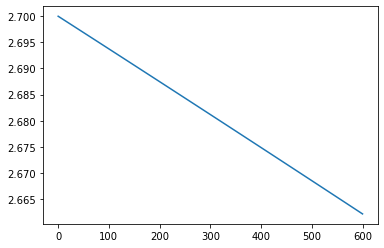

In [179]:
ts = np.linspace(0, 10*60, 100)
def x_e(t):
    return (xo**(5/2) - (5/2)*alpha*t)**(2/5)
plt.plot(ts, x_e(ts))

Ahora hagámoslo con el Runge Kutta

In [180]:
def f(t, x):
    return -alpha/x**(3/2)

sol = rk4(f, 0, 10*60, xo, 10*3)

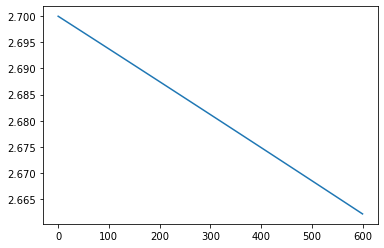

In [181]:
ts = np.linspace(0, 10*60, 100)
plt.plot(*sol)

Para encontrar el punto donde el tanque está vacío usamos un Runge Kutta modificado

In [182]:
def rk4_m(f, a, h, yo):
    
    t = a
    w = yo
    
    while not np.isnan(w):
        k1 = h*f(t, w)
        k2 = h*f(t+h/2, w+k1/2)
        k3 = h*f(t+h/2, w+k2/2)
        k4 = h*f(t + h, w + k3)
        w = w + (k1 + 2*k2 + 2*k3 + k4)/6
        t = t + h

    return t/60

In [183]:
rk4_m(f, 0, 60, xo)

/Users/jorgenorena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


289.0

### Tarea 11.5

Considere el problema de valor inicial

$$
y'(t) = 10y(t)- 10t^{-2} - 2t^{-3}\,,\quad 1 \leq t \leq 2
$$

Resuleva este problema para las siguientes condiciones iniciales usando el método de Runge-Kutta-Fehlberg para las tolerancias $0.01, 0.001, 0.0001, 10^{-5}$.

* $y(1) = 2$
* $y(1) = 1$
* $y(1) = 0.1$

¿Son consistentes las soluciones? Explique lo que ocurre.

In [145]:
def f(t, y):
    return 10*y - 10/t**2 -2/t**3

In [146]:
tols = [0.01, 0.001, 0.0001, 0.00001]

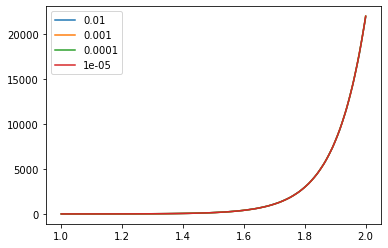

In [147]:
yo = 2
results = [rkf(f, 1, 2, yo, t, 1e-6, 0.2)[:2] for t in tols]
for i in range(len(tols)):
    plt.plot(*results[i], label=tols[i])
plt.legend()

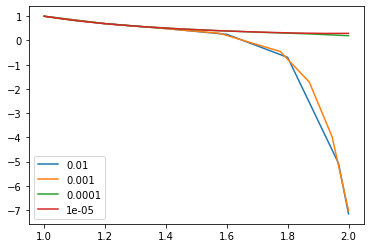

In [148]:
yo = 1
results = [rkf(f, 1, 2, yo, t, 1e-6, 0.2)[:2] for t in tols]
for i in range(len(tols)):
    plt.plot(*results[i], label=tols[i])
plt.legend()

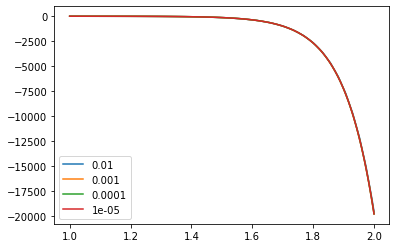

In [149]:
yo = 0.1
results = [rkf(f, 1, 2, yo, t, 1e-6, 0.2)[:2] for t in tols]
for i in range(len(tols)):
    plt.plot(*results[i], label=tols[i])
plt.legend()

El caso con $y(1) = 1$ da una solución inestable, tal que una pequeña desviación nos aleja de la solución correcta.